*part1*

In [1]:
# reading the cube from a text file
def read_cube(file_name):
    with open(file_name) as f:
        lines = f.readlines()
        maze = [[int(c) if c.isdigit() else (0 if c == 'S' else 99) for c in line.split()] for line in lines]
        return maze


In [2]:
# Your task is to implement a cube solver using blind search algorithms (Depth-First Search-DFS and
# Breadth-First Search-BFS). You are given a 2D array representing a cube, where 0s represent open
# spaces and 1s represent walls. You need to find a path from the starting point to the goal point, where
# the starting point is at the top left corner of the cube (0,0) and the goal point is at the bottom right
# corner of the cube (n-1, m-1) where n and m are the dimensions of the cube. Following is a sample
# Cube.

# 1 0 S 0 1 0 0
# 1 1 0 0 0 1 1
# 0 1 0 1 0 0 0
# 1 1 0 1 1 0 1
# 0 1 0 1 0 0 0
# 0 1 1 1 0 1 1
# G 0 0 0 0 0 0

from typing import List, Tuple
from collections import deque

# Depth-First Search algorithm
def dfs(maze: List[List[int]], start: Tuple[int, int], goal: Tuple[int, int]) -> List[Tuple[int, int]]:
    """"Returns a list of nodes in the path from start to goal, or an empty list if no path exists"""
    def search(curr):
        """Returns True if goal is found, False otherwise"""
        if curr == goal:
            return True
        # append the current node to the visited list
        visited.add(curr)
        # search neighbors of the current node
        for neighbor in neighbors(curr):
            if neighbor not in visited and maze[neighbor[0]][neighbor[1]] != 1:
                if search(neighbor):
                    path.append(neighbor)
                    return True
        return False

    def neighbors(node):
        """Returns a list of neighbors of node"""
        # for row and column in search directions
        for r, c in ((-1, 0), (0, 1), (1, 0), (0, -1)):
            neighbor = (node[0] + r, node[1] + c)
            if 0 <= neighbor[0] < len(maze) and 0 <= neighbor[1] < len(maze[0]) and maze[neighbor[0]][neighbor[1]] != 1:
                yield neighbor

    path = [start]
    visited = set()
    search(start)
    return path[::-1]

print(dfs(read_cube('q1.txt'), (0, 2), (6, 0)))


[(0, 3), (1, 3), (1, 4), (2, 4), (2, 5), (3, 5), (4, 5), (4, 4), (5, 4), (6, 4), (6, 3), (6, 2), (6, 1), (6, 0), (0, 2)]


In [3]:
def bfs(maze: List[List[int]], start: Tuple[int, int], goal: Tuple[int, int]) -> List[Tuple[int, int]]:
    """Returns a list of nodes in the path from start to goal, or an empty list if no path exists"""
    def neighbors(node):
        """Returns a list of neighbors of node"""
        # for row and column in search directions
        for r, c in ((-1, 0), (0, 1), (1, 0), (0, -1)):
            neighbor = (node[0] + r, node[1] + c)
            if 0 <= neighbor[0] < len(maze) and 0 <= neighbor[1] < len(maze[0]) and maze[neighbor[0]][neighbor[1]] != 1:
                yield neighbor
    dq = deque([start])
    visited = set([start])
    parent = {start: None}

    while dq:
        node = dq.popleft()
        if node == goal:
            break
        for neighbor in neighbors(node):
            if neighbor not in visited and maze[neighbor[0]][neighbor[1]] != 1:
                visited.add(neighbor)
                dq.append(neighbor)
                parent[neighbor] = node

    path = list()
    while node:
        path.append(node)
        node = parent[node]

    return path[::-1]

print(bfs(read_cube('q1.txt'), (0, 2), (6, 0)))

[(0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (2, 5), (3, 5), (4, 5), (4, 4), (5, 4), (6, 4), (6, 3), (6, 2), (6, 1), (6, 0)]


DFS Path: [(6, 5), (6, 4), (6, 3), (6, 2), (6, 1), (6, 0), (6, 6)]
BFS Path: [(6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (6, 1), (6, 0)]
Now plotting
which path to plot?	1. DFS	2. BFS


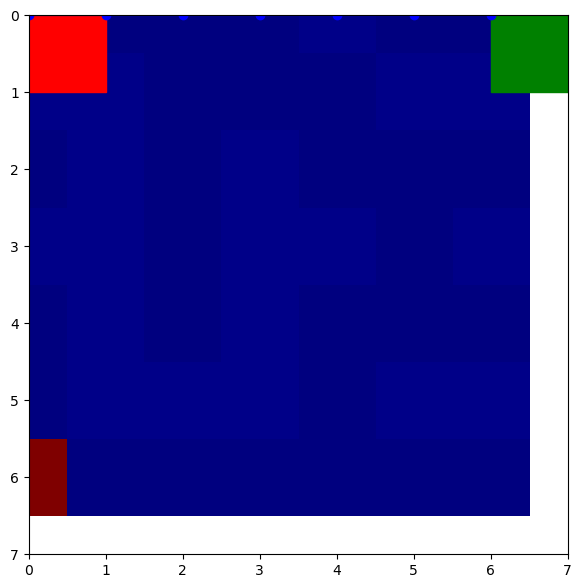

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def main():
    file_name = input("Enter maze file name: ")
    maze = read_cube(file_name)
    start = None
    goal = None
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if maze[i][j] == 0:
                start = (i, j)
            elif maze[i][j] == 99:
                goal = (i, j)
                
    dfs_path = dfs(maze, start, goal)
    bfs_path = bfs(maze, start, goal)
    
    print(f"DFS Path: {dfs_path}")
    print(f"BFS Path: {bfs_path}")


    
    # Create a heatmap of the maze
    cmap = plt.get_cmap('jet')
    norm = plt.Normalize(vmin=np.min(maze), vmax=np.max(maze))
    heatmap = cmap(norm(maze))
    
    # Plot the heatmap
    fig, ax = plt.subplots(figsize=(len(maze[0]), len(maze)))
    ax.imshow(heatmap, interpolation='nearest', origin='lower')
    
    # Plot the start and goal points
    ax.add_patch(plt.Rectangle((start[1], len(maze)-start[0]-1), 1, 1, color='green'))
    ax.add_patch(plt.Rectangle((goal[1], len(maze)-goal[0]-1), 1, 1, color='red'))
    
    # Plot the path
    print('Now plotting\nwhich path to plot?\t1. DFS\t2. BFS')
    choice = input()
    if choice == '1':
        x, y = zip(*dfs_path)
        ax.plot(y, len(maze)-1-np.array(x), 'bo-')
    if choice == '2':
        x, y = zip(*bfs_path)
        ax.plot(y, len(maze)-1-np.array(x), 'bo-')
    
    # Set axis limits and ticks
    ax.set_xlim(0, len(maze[0]))
    ax.set_ylim(0, len(maze))
    ax.set_xticks(range(len(maze[0])+1))
    ax.set_yticks(range(len(maze)+1))
    
    # Invert y-axis to match maze orientation
    ax.invert_yaxis()
    
    # Show the plot
    plt.show()

if __name__ == '__main__':
    main()


*part2*

In [5]:
import plotly.graph_objs as go
import numpy as np
import plotly.express as px

# Reading the cube from a text file
def read_cube(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    cube = [[int(cell) if cell.isdigit() else cell for cell in line.split()] for line in lines]
    return cube

def astar(cube):
    start = (0, 0)
    goal = (len(cube)-1, len(cube[0])-1)
    open_set = {start}
    came_from = {}
    g_score = {start: 0}
    f_score = {start: h(start, goal)}
    while open_set:
        current = min(open_set, key=lambda x: f_score[x])
        if current == goal:
            return construct_path(came_from, current)
        open_set.remove(current)
        for neighbor in [(current[0]+1, current[1]), (current[0]-1, current[1]), (current[0], current[1]+1), (current[0], current[1]-1)]:
            if 0 <= neighbor[0] < len(cube) and 0 <= neighbor[1] < len(cube[0]):
                if cube[neighbor[0]][neighbor[1]] == 1:
                    continue
                elif cube[neighbor[0]][neighbor[1]] == 2:
                    neighbor = jump(neighbor, current, cube, goal)
                    if not neighbor:
                        continue
                tentative_g_score = g_score[current] + 1
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + h(neighbor, goal)
                    if neighbor not in open_set:
                        open_set.add(neighbor)
    return -1

def h(node, goal):
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])

def jump(node, parent, cube, goal):
    dx, dy = node[0] - parent[0], node[1] - parent[1]
    if dx == dy == 0:
        return node
    if dx != 0:
        if dx > 0:
            dirr = (1, 0)
        else:
            dirr = (-1, 0)
    else:
        if dy > 0:
            dirr = (0, 1)
        else:
            dirr = (0, -1)
    next_node = (node[0] + dirr[0], node[1] + dirr[1])
    if next_node == goal or cube[next_node[0]][next_node[1]] == 1:
        return None
    elif cube[next_node[0]][next_node[1]] == 0:
        return jump(next_node, node, cube, goal)
    elif cube[next_node[0]][next_node[1]] == 2:
        jump_node = jump(next_node, node, cube, goal)
        if jump_node:
            return jump_node
        else:
            return jump(next_node, node, cube, goal)

def construct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    return path[::-1]

# Set up the cube and start/goal positions
cube = read_cube('q2.txt')
start = (0, 0)
goal = (len(cube)-1, len(cube[0])-1)

# Run A* algorithm to find the shortest path
path = astar(cube)

# Create a 3D scatter plot to visualize the cube and the path
x, y, z = np.indices((len(cube), len(cube[0]), len(cube[0])))
colors = np.empty((len(cube), len(cube[0]), len(cube[0])), dtype=object)
colors[cube == 0] = 'white'
colors[cube == 1] = 'black'
colors[cube == 2] = 'gray'
colors[start] = 'green'
colors[goal] = 'red'
for node in path:
    colors[node] = 'blue'
scatter = go.Scatter3d(x=x.flatten(), y=y.flatten(), z=z.flatten(),
                       mode='markers', marker=dict(size=5, color=colors.flatten()))
fig = go.Figure(data=[scatter])
fig.show()


TypeError: 'int' object is not iterable

In [6]:
print(astar(read_cube('q2.txt' )))

-1
